### This is a trying for using the Larch Library to do the curve fitting as Xinyue did,
for more info, https://xraypy.github.io/xraylarch/fitting/examples.html

In [ ]:
from larch import *

In [48]:
from larch.math.utils import index_of

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
path = "/Users/hsiaoyuhsien/Downloads/energy_mu.dat"

In [71]:
# just a dataframe help me to see what range of the ev I am going to use
df = pd.read_csv(path, delimiter = '\s+', header=None)

In [74]:
df.head(28)

,0,1
0,8973.043,0.041125
1,8974.910,0.048252
2,8976.627,0.057184
3,8978.195,0.068521
4,8979.614,0.083100
5,8980.884,0.102074
6,8982.004,0.126962
7,8982.866,0.155152
8,8983.798,0.201092
9,8984.731,0.274134


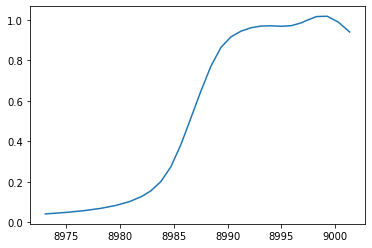

In [73]:
# brief plot
plt.plot(df[0], df[1])

In [100]:
print(dat.xmu)

[0.0411249 0.0482525 0.0571843 0.0685215 0.0831005 0.102074  0.126962
 0.155152  0.201092  0.274134  0.384085  0.515442  0.648596  0.771821
 0.864113  0.916226  0.944148  0.960968  0.969423  0.970467  0.968222
 0.970919  0.98482   0.99652   1.01621   1.01777   0.989262  0.939835
 0.894853  0.877113  0.887534  0.907199  0.920986  0.93623   0.959435
 0.989834  1.02298   1.04736   1.04823   1.02345   0.986271  0.950352
 0.921838  0.903487  0.897121  0.902757  0.916909  0.934033  0.949142
 0.960292  0.968573  0.976181  0.984313  0.993466  1.00437   1.01701  ]


In [95]:
## examples/fitting/doc_example2a.lar
# read data
dat = io.read_ascii(path, labels='energy xmu')
# do pre-processing steps, here XAFS pre-edge removal
xafs.pre_edge(dat.energy, dat.xmu, group=dat)
# select data range to be considered in the fit here.
# note that this could be done inside the objective function,
# but doing these steps here means it done only once.
i1, i2 = index_of(dat.energy, 8973.043), index_of(dat.energy, 9001.363)
dat.e = dat.energy[i1+1:i2+1]
dat.y = dat.norm[i1+1:i2+1]
def make_model(pars, data, components=False):
    """make model of spectra: 2 peak functions, 1 erf function, offset"""
    p1 = gaussian(data.e, pars.amp1, pars.cen1, pars.wid1)
    p2 = gaussian(data.e, pars.amp2, pars.cen2, pars.wid2)
    e1 = pars.off + pars.erf_amp * erf( pars.erf_wid*(data.e - pars.erf_cen))
    sum = p1 + p2 + e1
    if components:
        return sum, p1, p2,  e1
    endif
    return sum

In [103]:
# got problem here!
# create a parameter group for the fit:
params = fitting.param_group(
    cen1 = fitting.param(8983, vary=True, min=8973.043, max=8993.121),
    cen2 = fitting.param(8997, vary=True, min=8993.121, max=9001.363),
    amp1 = fitting.param(0.25, vary=True, min=0),
    amp2 = fitting.param(0.25, vary=True, min=0),
    wid1 = fitting.param(0.6, vary=True, min=0.05),
    wid2 = fitting.param(1.2, vary=True, min=0.05),
    off  = fitting.param(0.50, vary=True),
    erf_amp = fitting.param(0.50, vary=True),
    erf_wid = fitting.param(0.50, vary=True),
    erf_cen = fitting.param(9000.8, vary=True, min=9000.299, max=9001.363)
    )

AttributeError: 'NoneType' object has no attribute 'add'

In [78]:
def resid(pars, data):
    "fit residual"
    return make_model(pars, data) - data.y

AttributeError: 'Line2D' object has no property 'show_legend'

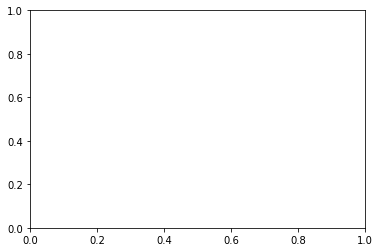

In [93]:
#mfit = fitting.minimize(resid, params, args=(dat,))
#print( fitting.fit_report(mfit, show_correl=False))
# now plot results (2 different windows)
#final, f1, f2, e1 = make_model(params, dat, components=True)
plt.plot(dat.e, dat.y,  label='data', marker='+',
     show_legend=True, legend_loc='ul',
     xlabel='Energy (eV)', ylabel='$\\mu(E)$',
     title='Fe pre-edge peak-fit: best fit and residual',
     new=True)
plt.plot(dat.e, final,  label='fit')
plt.plot(dat.e, (final-dat.y)*10, label='diff (10x)')
plt.plot(dat.e, dat.y, label='data', marker='+',
     show_legend=True, legend_loc='ul',
     xlabel='Energy (eV)', ylabel='$\\mu(E)$',
     title='Fe pre-edge peak-fit: components',
     new=True, win=2)
plt.plot(dat.e, f1, label='peak1', win=2)
plt.plot(dat.e, f2, label='peak2', win=2)
plt.plot(dat.e, e1, label='erf +offset', win=2, color='red', style='dashed')
